# A study on impact of COVID-19 on global wheat trade

## Part - 1

>Analysis of global wheat tender data.

**Dataset**
- url =  "https://www.agricensus.com/tenders/"

- This dataset is about global wheat tender activities and pulled from Agricensus, Which is a agriculture market infomation service company. 

- The data includes tender date, origin, destination, tender volumen and price etc.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup as bs

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data import and cleanup

In [3]:
tender = pd.read_csv("Tender_Wheat.csv")

In [4]:
tender

Reported      Country Tenderer Product      Quality          Company  \
0     03 Sep 2020        Egypt     GASC   Wheat  Milling 12%          Cargill   
1     01 Sep 2020  Philippines    PAFMI   Wheat         Feed              CBH   
2     27 Aug 2020  South Korea     NOFI   Wheat         Feed            Cofco   
3     25 Aug 2020       Taiwan      FMA   Wheat    HRS 14.5%   Columbia Grain   
4     25 Aug 2020       Taiwan      FMA   Wheat    HRS 14.5%              CHS   
...           ...          ...      ...     ...          ...              ...   
1231  04 Oct 2017       Jordan      MIT   Wheat  Milling 11%          Nibulon   
1232  03 Oct 2017        Egypt     GASC   Wheat  Milling 12%  Garant Logistik   
1233  03 Oct 2017        Egypt     GASC   Wheat  Milling 12%              AOS   
1234  03 Oct 2017      Tunisia      ODC   Wheat        Durum         Glencore   
1235  03 Oct 2017      Tunisia      ODC   Wheat        Durum          Ameropa   

         Origin    Del start      Del end   Vol mt     $/mt  
0        Russia  05 Nov 2020  15 Nov 2020   55,000  $240.50  
1     Australia  01 Nov 2020  31 Dec 2020  110,000  $255.00  
2           NaN  28 Oct 2020  20 Dec 2020   65,000  $245.95  
3            US  29 Oct 2020  12 Nov 2020   30,635  $299.62  
4            US  13 Oct 2020  27 Oct 2020   30,955  $300.68  
...         ...          ...          ...      ...      ...  
1231    Ukraine  01 Feb 2018  15 Feb 2018   50,000  $229.00  
1232     Russia  05 Nov 2017  15 Nov 2017   60,000  $212.75  
1233     Russia  05 Nov 2017  15 Nov 2017  120,000  $213.40  
1234        NaN  01 Dec 2017  31 Dec 2017   50,000  $287.79  
1235        NaN  01 Dec 2017  31 Dec 2017   50,000  $289.04  

[1236 rows x 11 columns]

In [5]:
# Renaming columns to a more intuitive name

tender.rename(columns= {"Reported":"Date",
                        "Country":"Importer",
                        "Origin":"Exporter",
                        "Del start":"Shipment_Start",
                        "Del end":"Shipment_End",
                        "Vol mt":"Volume_mts",
                        "$/mt":"wheat_price"}, inplace=True)

In [6]:
tender.head()

Date     Importer Tenderer Product      Quality         Company  \
0  03 Sep 2020        Egypt     GASC   Wheat  Milling 12%         Cargill   
1  01 Sep 2020  Philippines    PAFMI   Wheat         Feed             CBH   
2  27 Aug 2020  South Korea     NOFI   Wheat         Feed           Cofco   
3  25 Aug 2020       Taiwan      FMA   Wheat    HRS 14.5%  Columbia Grain   
4  25 Aug 2020       Taiwan      FMA   Wheat    HRS 14.5%             CHS   

    Exporter Shipment_Start Shipment_End Volume_mts wheat_price  
0     Russia    05 Nov 2020  15 Nov 2020     55,000     $240.50  
1  Australia    01 Nov 2020  31 Dec 2020    110,000     $255.00  
2        NaN    28 Oct 2020  20 Dec 2020     65,000     $245.95  
3         US    29 Oct 2020  12 Nov 2020     30,635     $299.62  
4         US    13 Oct 2020  27 Oct 2020     30,955     $300.68

In [7]:
print(tender.isnull().sum())
print(tender.info())

Date                0
Importer            0
Tenderer            0
Product             0
Quality             0
Company             0
Exporter          580
Shipment_Start     12
Shipment_End       15
Volume_mts          0
wheat_price        68
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1236 non-null   object
 1   Importer        1236 non-null   object
 2   Tenderer        1236 non-null   object
 3   Product         1236 non-null   object
 4   Quality         1236 non-null   object
 5   Company         1236 non-null   object
 6   Exporter        656 non-null    object
 7   Shipment_Start  1224 non-null   object
 8   Shipment_End    1221 non-null   object
 9   Volume_mts      1236 non-null   object
 10  wheat_price     1168 non-null   object
dtypes: object(11)
memory usage: 106.3+ KB
None


In [8]:
# Many tenderers do not disclose the origin of their supply, so we fillna "Unknown" for "Exporter" with Nan.

tender["Exporter"] = tender["Exporter"].fillna("Unknown")
tender.dropna(inplace = True)

In [9]:
# Wrangling data to suitable dtype

tender["Volume_mts"] = tender["Volume_mts"].str.replace(',', '').astype(float)
tender["wheat_price"] = tender["wheat_price"].str.replace('$', '').astype(float)
tender['Date'] = pd.to_datetime(tender['Date'])
tender['Shipment_Start'] = pd.to_datetime(tender['Shipment_Start'])

In [10]:
# Creating new columns for furthur analysis

tender["Revenue"] = tender["Volume_mts"] * tender["wheat_price"]
tender['Shipment_Month'] = tender['Shipment_Start'].dt.month
tender["tender_month"] = tender["Date"].dt.month

In [11]:
def season(x):
    if 4 <= x <= 6:
        return "Planting"
    elif 7 <= x <= 9:
        return "Harvesting"
    else:
        return "Others"
tender['Season'] = tender['Shipment_Month'].apply(lambda x: season(x))

In [12]:
tender

Date     Importer Tenderer Product      Quality          Company  \
0    2020-09-03        Egypt     GASC   Wheat  Milling 12%          Cargill   
1    2020-09-01  Philippines    PAFMI   Wheat         Feed              CBH   
2    2020-08-27  South Korea     NOFI   Wheat         Feed            Cofco   
3    2020-08-25       Taiwan      FMA   Wheat    HRS 14.5%   Columbia Grain   
4    2020-08-25       Taiwan      FMA   Wheat    HRS 14.5%              CHS   
...         ...          ...      ...     ...          ...              ...   
1231 2017-10-04       Jordan      MIT   Wheat  Milling 11%          Nibulon   
1232 2017-10-03        Egypt     GASC   Wheat  Milling 12%  Garant Logistik   
1233 2017-10-03        Egypt     GASC   Wheat  Milling 12%              AOS   
1234 2017-10-03      Tunisia      ODC   Wheat        Durum         Glencore   
1235 2017-10-03      Tunisia      ODC   Wheat        Durum          Ameropa   

       Exporter Shipment_Start Shipment_End  Volume_mts  wheat_price  \
0        Russia     2020-11-05  15 Nov 2020     55000.0       240.50   
1     Australia     2020-11-01  31 Dec 2020    110000.0       255.00   
2       Unknown     2020-10-28  20 Dec 2020     65000.0       245.95   
3            US     2020-10-29  12 Nov 2020     30635.0       299.62   
4            US     2020-10-13  27 Oct 2020     30955.0       300.68   
...         ...            ...          ...         ...          ...   
1231    Ukraine     2018-02-01  15 Feb 2018     50000.0       229.00   
1232     Russia     2017-11-05  15 Nov 2017     60000.0       212.75   
1233     Russia     2017-11-05  15 Nov 2017    120000.0       213.40   
1234    Unknown     2017-12-01  31 Dec 2017     50000.0       287.79   
1235    Unknown     2017-12-01  31 Dec 2017     50000.0       289.04   

         Revenue  Shipment_Month  tender_month  Season  
0     13227500.0              11             9  Others  
1     28050000.0              11             9  Others  
2     15986750.0              10             8  Others  
3      9178858.7              10             8  Others  
4      9307549.4              10             8  Others  
...          ...             ...           ...     ...  
1231  11450000.0               2            10  Others  
1232  12765000.0              11            10  Others  
1233  25608000.0              11            10  Others  
1234  14389500.0              12            10  Others  
1235  14452000.0              12            10  Others  

[1153 rows x 15 columns]

In [13]:
print(tender.isnull().sum())
print(tender.info())

Date              0
Importer          0
Tenderer          0
Product           0
Quality           0
Company           0
Exporter          0
Shipment_Start    0
Shipment_End      0
Volume_mts        0
wheat_price       0
Revenue           0
Shipment_Month    0
tender_month      0
Season            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 0 to 1235
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1153 non-null   datetime64[ns]
 1   Importer        1153 non-null   object        
 2   Tenderer        1153 non-null   object        
 3   Product         1153 non-null   object        
 4   Quality         1153 non-null   object        
 5   Company         1153 non-null   object        
 6   Exporter        1153 non-null   object        
 7   Shipment_Start  1153 non-null   datetime64[ns]
 8   Shipment_End    1153 non-null   object        
 9   Vol

In [14]:
# Filtering out wheat quality with total tender volume below 30,000 mts over the past 3 years.
Quality_vol = (tender.groupby("Quality").Volume_mts.sum().sort_values(ascending = False)).reset_index()
Quality_vol

Quality  Volume_mts
0     Milling 11%  17597000.0
1     Milling 12%  15854000.0
2   Milling 12.5%  11668000.0
3   Milling 11.5%   4345000.0
4   Milling 13.5%   3324500.0
5            Feed   3252000.0
6           Durum   1708500.0
7       HRS 14.5%   1590171.0
8       HRW 12.5%    988132.0
9          SWW 9%    447208.0
10        SRW 11%    420000.0
11      SWW 10.5%    278720.0
12        DNS 14%    202240.0
13      HRW 11.5%    164110.0
14        Milling    130000.0
15        ASW 11%    121400.0
16     WRSW 13.5%     71100.0
17      AHW 11.5%     55600.0
18            ASW     40000.0
19        HRW 12%     34180.0
20       SWW 8.5%     26250.0
21        HRS 14%     10922.0
22       SWW 9.5%      7780.0

In [15]:
High_vol_list = Quality_vol.query("Volume_mts > 300000")['Quality'].unique()
High_vol_list

array(['Milling 11%', 'Milling 12%', 'Milling 12.5%', 'Milling 11.5%',
       'Milling 13.5%', 'Feed', 'Durum', 'HRS 14.5%', 'HRW 12.5%',
       'SWW 9%', 'SRW 11%'], dtype=object)

In [16]:
tender_clean = tender[tender['Quality'].isin(High_vol_list)]
len(tender) - len(tender_clean) #loss of datapoints not significant

89

In [17]:
# Setting 1st March 2020 as Covid-19 cut-off time for the pre vs post comparison study

Post_covid19 = tender_clean[tender_clean["Date"] > "2020-03-01"]

Post_covid19.head()

Date     Importer Tenderer Product      Quality         Company  \
0 2020-09-03        Egypt     GASC   Wheat  Milling 12%         Cargill   
1 2020-09-01  Philippines    PAFMI   Wheat         Feed             CBH   
2 2020-08-27  South Korea     NOFI   Wheat         Feed           Cofco   
3 2020-08-25       Taiwan      FMA   Wheat    HRS 14.5%  Columbia Grain   
4 2020-08-25       Taiwan      FMA   Wheat    HRS 14.5%             CHS   

    Exporter Shipment_Start Shipment_End  Volume_mts  wheat_price     Revenue  \
0     Russia     2020-11-05  15 Nov 2020     55000.0       240.50  13227500.0   
1  Australia     2020-11-01  31 Dec 2020    110000.0       255.00  28050000.0   
2    Unknown     2020-10-28  20 Dec 2020     65000.0       245.95  15986750.0   
3         US     2020-10-29  12 Nov 2020     30635.0       299.62   9178858.7   
4         US     2020-10-13  27 Oct 2020     30955.0       300.68   9307549.4   

   Shipment_Month  tender_month  Season  
0              11             9  Others  
1              11             9  Others  
2              10             8  Others  
3              10             8  Others  
4              10             8  Others

In [18]:
# Preparing the post_covid19 period data(March to September) from 2018 and 2019 as control for picking up seasonality

covid_months_2018 = tender_clean[(tender_clean["Date"] < "2018-09-03") & (tender_clean["Date"] > "2018-03-01")]
covid_months_2019 = tender_clean[(tender_clean["Date"] < "2019-09-03") & (tender_clean["Date"] > "2019-03-01")]

In [19]:
print("No of observed data points under \n Post_covid19 = {} \n covid_months_2018 = {} \n covid_months_2019 = {}"
      .format(len(Post_covid19),len(covid_months_2018),len(covid_months_2019)))

No of observed data points under 
 Post_covid19 = 191 
 covid_months_2018 = 128 
 covid_months_2019 = 160


In [20]:
print("However, the wheat price data avaialble grouped by reported date reduces to \n Post_covid19 = {} \n covid_months_2018 = {} \n covid_months_2019 = {}"
    .format(Post_covid19.groupby("Date").wheat_price.mean().count(),
    covid_months_2018.groupby("Date").wheat_price.mean().count(),
    covid_months_2019.groupby("Date").wheat_price.mean().count()))

However, the wheat price data avaialble grouped by reported date reduces to 
 Post_covid19 = 56 
 covid_months_2018 = 35 
 covid_months_2019 = 43


### Analysis of wheat tender prices

Text(0, 0.5, 'Price (USD) per MT')

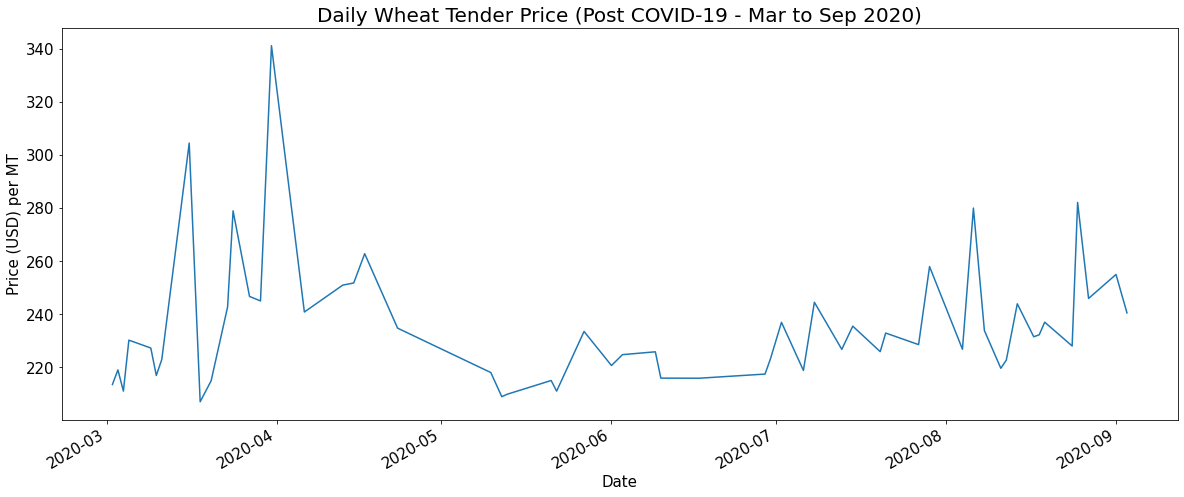

In [21]:
Post_covid19_daily_price = Post_covid19.groupby("Date").wheat_price.mean()
Post_covid19_daily_price.plot(figsize = (20,8), fontsize = 15, label = "post-covid")

plt.title("Daily Wheat Tender Price (Post COVID-19 - Mar to Sep 2020)", fontsize = 20)
plt.xlabel("Date",fontsize = 15)
plt.ylabel("Price (USD) per MT", fontsize = 15)


Text(0, 0.5, 'Price (USD) per MT')

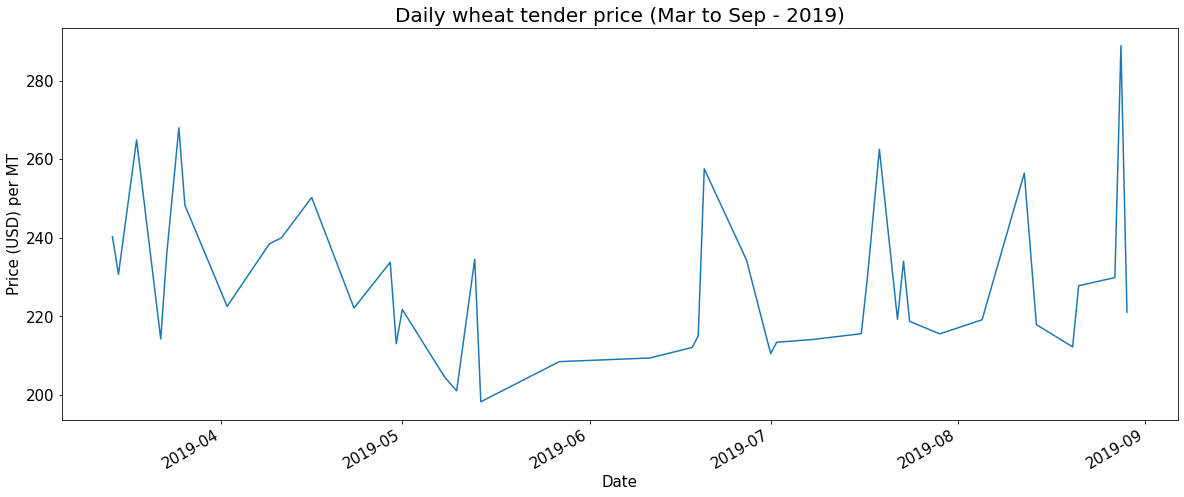

In [22]:
covid_months_2019_daily_price = covid_months_2019.groupby("Date").wheat_price.mean()
covid_months_2019_daily_price.plot(figsize = (20,8), fontsize = 15, label = "pre-covid")

plt.title("Daily wheat tender price (Mar to Sep - 2019)", fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Price (USD) per MT", fontsize = 15)

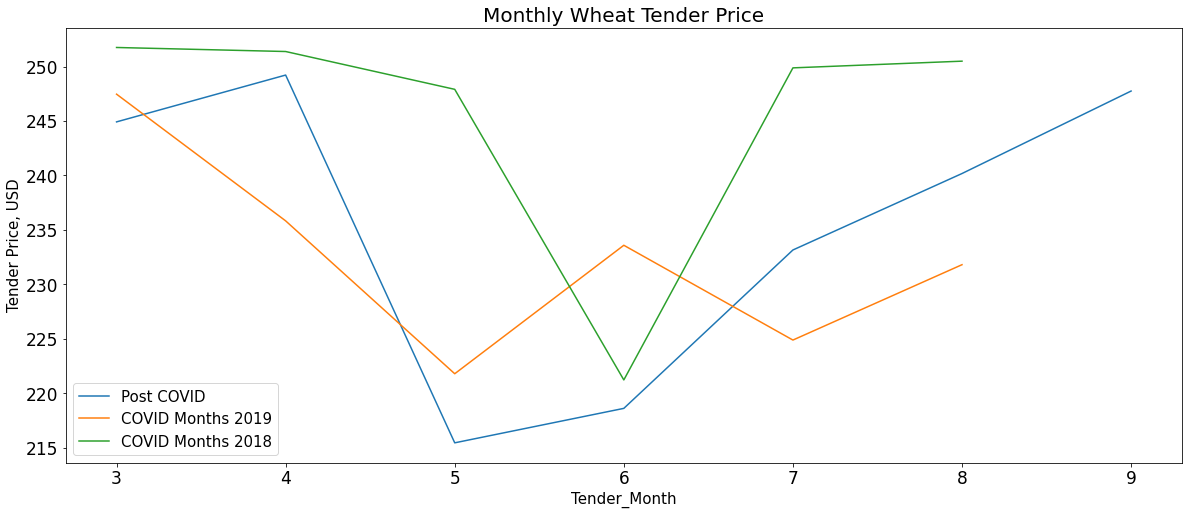

In [23]:
# Studying the average monthly wheat tender prices to identify any observable trends.

Post_covid19_month_price = Post_covid19.groupby('tender_month').wheat_price.mean()
Post_covid19_month_price.plot(figsize = (20,8), fontsize = 17, label = "Post COVID")

covid_months_2019_monthly_price = covid_months_2019.groupby('tender_month').wheat_price.mean()
covid_months_2019_monthly_price.plot(figsize = (20,8), fontsize = 17, label = "COVID Months 2019")

covid_months_2018_monthly_price = covid_months_2018.groupby('tender_month').wheat_price.mean()
covid_months_2018_monthly_price.plot(figsize = (20,8), fontsize = 17, label = "COVID Months 2018")

plt.title("Monthly Wheat Tender Price", fontsize = 20)
plt.xlabel("Tender_Month",fontsize = 15)
plt.ylabel("Tender Price, USD", fontsize = 15)
plt.legend(fontsize = 15)

>We observe sharp spikes in wheat tender daily prices during March - May period, however the trends gets smoothened out in average monthly prices.

>Given the discontinuity in the available data points between the two periods, a conclusion on similarity/dissimilarity in price trend movements could not be made from the above observation.

In [24]:
# Percentage change between reported periods = PCRP

covid_months_2018_daily_price = covid_months_2018.groupby("Date").wheat_price.mean()

Post_covid19_PCRP = Post_covid19_daily_price[1:] / Post_covid19_daily_price[:-1].values - 1
covid_months_2019_PCRP = covid_months_2019_daily_price / covid_months_2019_daily_price.shift(1) - 1
covid_months_2018_PCRP = covid_months_2018_daily_price.pct_change()

print(f"Statistical summary of price changes during \n\n Post COVID19 Period \n{Post_covid19_PCRP.describe()}, \n\n COVID months 2019 \n{covid_months_2019_PCRP.describe()}, \n\n COVID months 2018 \n{covid_months_2018_PCRP.describe()}")

Statistical summary of price changes during 

 Post COVID19 Period 
count    55.000000
mean      0.009509
std       0.123365
min      -0.320302
25%      -0.048264
50%       0.004468
75%       0.040348
max       0.392912
Name: wheat_price, dtype: float64, 

 COVID months 2019 
count    42.000000
mean      0.003959
std       0.110025
min      -0.235029
25%      -0.076553
50%       0.008005
75%       0.066831
max       0.256983
Name: wheat_price, dtype: float64, 

 COVID months 2018 
count    34.000000
mean      0.011654
std       0.133048
min      -0.210095
25%      -0.079392
50%      -0.005141
75%       0.067872
max       0.295403
Name: wheat_price, dtype: float64


>We are unable to conclusively distinguish the impact on the variability of the price changes using the above data.

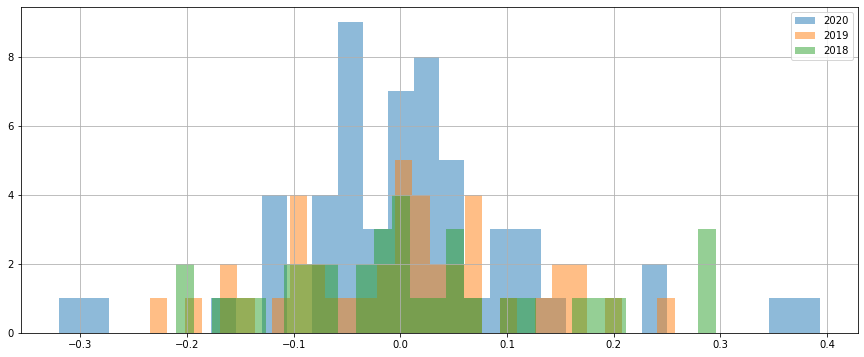

In [25]:
#Visualizing the pattern of distribution of returns in a histogram
Post_covid19_PCRP.hist(bins = 30, figsize = (15,6), alpha = 0.5, label = "2020")
covid_months_2019_PCRP.hist(bins = 30, figsize = (15,6), alpha = 0.5, label = "2019")
covid_months_2018_PCRP.hist(bins = 30, figsize = (15,6), alpha = 0.5, label = "2018")
plt.legend(loc="upper right")

>Based on the observed distribution, we can conclude the daily price change distribution has more extreme values indicating higher kurtosis. Given that we have studied this pattern for seasonaility by comparison with preceding years, we can conclude that the onset of COVID-19 has had an impact on the Wheat tender prices.

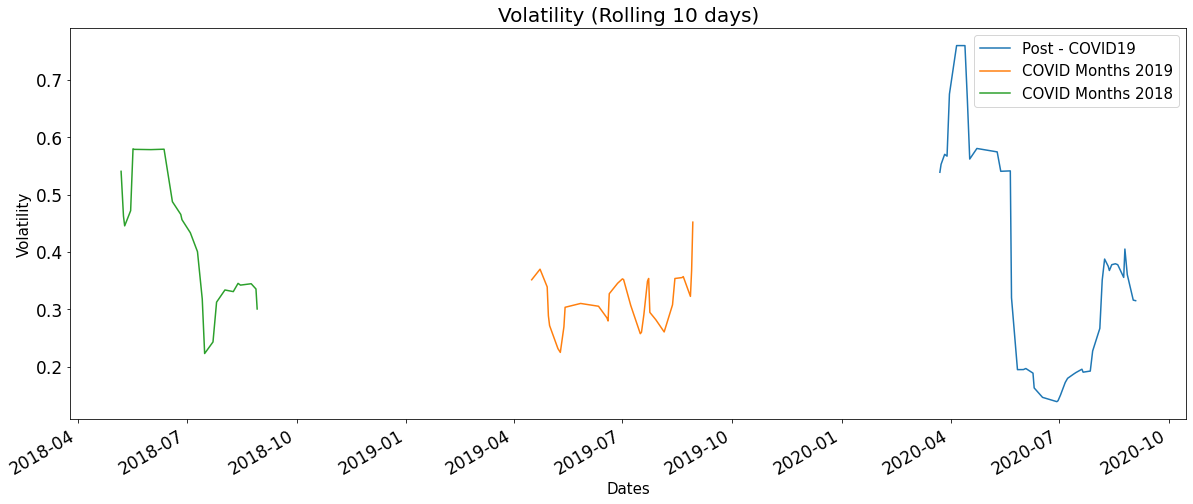

In [26]:
# In Mid-March, volatility reached around 0.73 compared with previous year around 0.35. 
# Between April to July, this year volatily is slightly lower than previous year, but went higher again after July

Post_covid19_vol = Post_covid19_PCRP.rolling(10).std()* np.sqrt(10)
Post_covid19_vol.plot(figsize = (20,8), fontsize = 17, label = "Post - COVID19")

Pre_covid19_2019_vol = covid_months_2019_PCRP.rolling(10).std()* np.sqrt(10)
Pre_covid19_2019_vol.plot(figsize = (20,8), fontsize = 17, label = "COVID Months 2019")

Pre_covid19_2018_vol = covid_months_2018_PCRP.rolling(10).std()* np.sqrt(10)
Pre_covid19_2018_vol.plot(figsize = (20,8), fontsize = 17, label = "COVID Months 2018")

plt.title("Volatility (Rolling 10 days)", fontsize = 20)
plt.xlabel("Dates",fontsize = 15)
plt.ylabel("Volatility", fontsize = 15)
plt.legend(fontsize = 15)

A sharp rise in volatility has been observed during the onset of the pandemic (Mid-march) on the tender prices.

### Analysis of Wheat tender volume

In [27]:
Post_covid19_volume = Post_covid19['Volume_mts'].sum()
covid_months_2019_volume = covid_months_2019['Volume_mts'].sum()
covid_months_2018_volume = covid_months_2018['Volume_mts'].sum()
print(f'2020 post covid-19 tender volume is {Post_covid19_volume} mts and the YoY growth is {round((Post_covid19_volume / covid_months_2019_volume - 1)*100)}%');
print(f'2019 same period tender volume is {covid_months_2019_volume} mts and the YoY growth is {round((covid_months_2019_volume / covid_months_2018_volume - 1)*100)}%');
print(f'2018 same period tender volume is {covid_months_2018_volume} mts')

2020 post covid-19 tender volume is 10948345.0 mts and the YoY growth is 16.0%
2019 same period tender volume is 9409325.0 mts and the YoY growth is 27.0%
2018 same period tender volume is 7424565.0 mts


>Growth in tender volume has softened in the Post-COVID 19 period in 2020

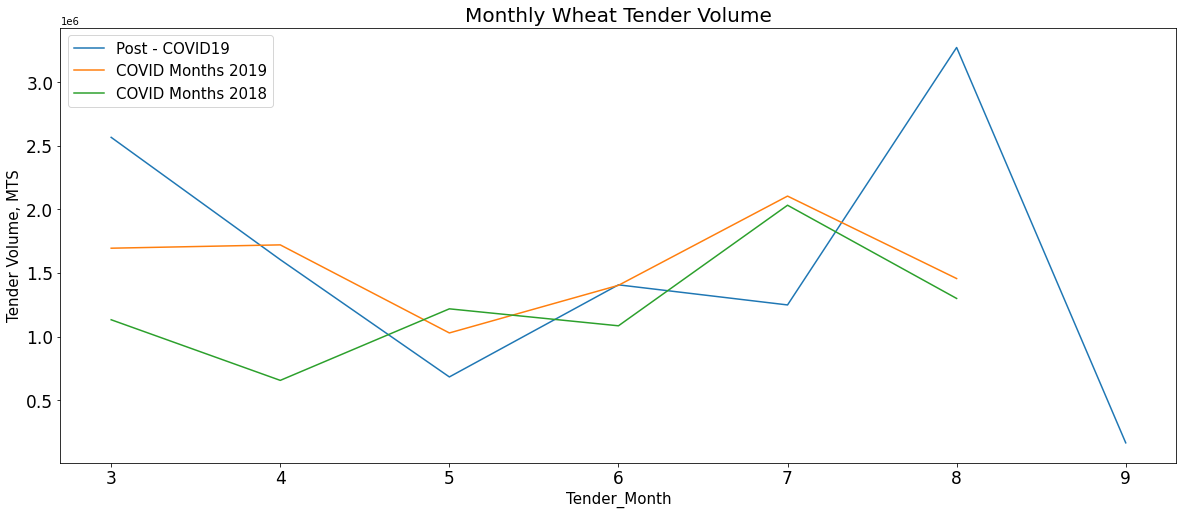

In [28]:
# Studying aggregate monthly volume trend 

Post_covid19_month_volume = Post_covid19.groupby('tender_month').Volume_mts.sum()
Post_covid19_month_volume.plot(figsize = (20,8), fontsize = 17, label = "Post - COVID19")

covid_months_2019_volume = covid_months_2019.groupby('tender_month').Volume_mts.sum()
covid_months_2019_volume.plot(figsize = (20,8), fontsize = 17, label = "COVID Months 2019")

covid_months_2018_volume = covid_months_2018.groupby('tender_month').Volume_mts.sum()
covid_months_2018_volume.plot(figsize = (20,8), fontsize = 17, label = "COVID Months 2018")

plt.title("Monthly Wheat Tender Volume", fontsize = 20)
plt.xlabel("Tender_Month",fontsize = 15)
plt.ylabel("Tender Volume, MTS", fontsize = 15)
plt.legend(fontsize = 15)

>We observe a steady drop in the months during the onset of the pandemic (March - May), post which the trends do not diverge drastically except towards Aug/Sep. No other discernible trends have been observed in the monthly tender volume during the Post COVID 19 period.

>The sharp drop observed in September was primarily due to the limited data points on volume of transactions available during the month (cut off data was 3rd Sept). So the drop can be ignored from the above study.

### Analysis of data by Country of Origin (Exporter) and exporting company

Text(0, 0.5, 'Volume, MTs')

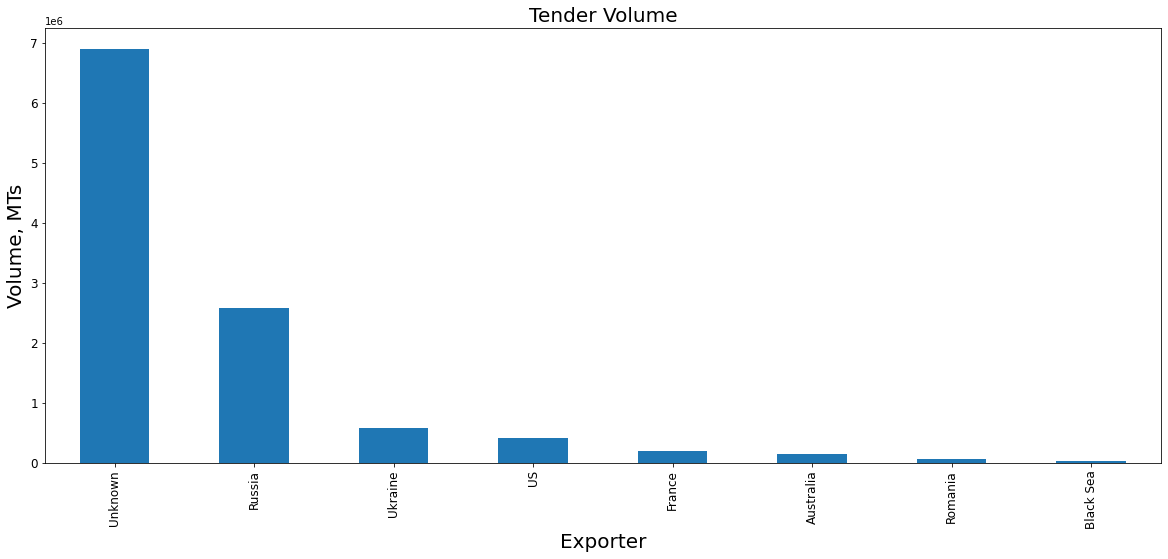

In [29]:
Origin_volume = Post_covid19.groupby("Exporter").Volume_mts.sum().sort_values(ascending = False)
Origin_volume.plot(kind = 'bar', figsize = (20,8), fontsize = 12)
plt.title("Tender Volume", fontsize = 20)
plt.xlabel("Exporter",fontsize = 20)
plt.ylabel("Volume, MTs", fontsize = 20)

>We will be studying price trends of the Top 5 exporters (ignoring 'Unknown') below.

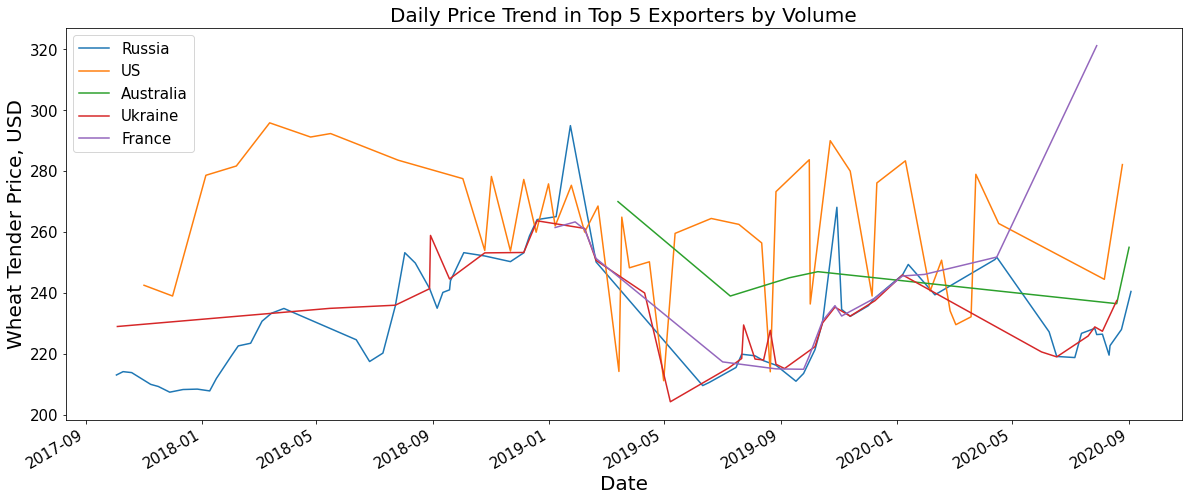

In [30]:
#For the price comparison we will use the entire 3 year tender data given the limited data points for each country.
# France is biggest wheat exporter in EU and its price trend absolutely catches my attention.
# Why France wheat price keep going up sharly since May shipment? Is it due to Covid-19 impact on French wheat supply chain?

Russia_data = tender[tender['Exporter'] == 'Russia']
Russia_price = Russia_data.groupby("Date").wheat_price.mean().sort_index(ascending = False)
US_data = tender[tender['Exporter'] == 'US']
US_price = US_data.groupby("Date").wheat_price.mean().sort_index(ascending = False)
Australia_data = tender[tender['Exporter'] == 'Australia']
Australia_price = Australia_data.groupby("Date").wheat_price.mean().sort_index(ascending = False)
Ukraine_data = tender[tender['Exporter'] == 'Ukraine']
Ukraine_price = Ukraine_data.groupby("Date").wheat_price.mean().sort_index(ascending = False)
France_data = tender[tender['Exporter'] == 'France']
France_price = France_data.groupby("Date").wheat_price.mean().sort_index(ascending = False)


Russia_price.plot(figsize = (20,8),fontsize = 15, label = "Russia")
US_price.plot(figsize = (20,8),fontsize = 15, label = "US")
Australia_price.plot(figsize = (20,8),fontsize = 15, label = "Australia")
Ukraine_price.plot(figsize = (20,8),fontsize = 15, label = "Ukraine")
France_price.plot(figsize = (20,8),fontsize = 15, label = "France")

plt.title("Daily Price Trend in Top 5 Exporters by Volume", fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Wheat Tender Price, USD", fontsize = 20)
plt.legend(fontsize = 15)

>Identifying the reason for the increase in french wheat prices

In [31]:
# France mainly sold Milling 11% grade wheat only, so we can conclude price is not driven by selling higher grade wheat. 

France_wheat_quality = tender[tender['Exporter'] == "France"]['Quality'].value_counts()
France_wheat_quality

Milling 11%    21
Durum           1
Name: Quality, dtype: int64

In [32]:
#Scraping the webpage to identify reason

url = "https://www.world-grain.com/articles/14011-france-to-produce-smallest-soft-wheat-crop-in-25-years"

soup = bs(requests.get(url).text)

In [33]:
soup.find(class_ = "body gsd-paywall article-body").text

'PARIS, FRANCE — Unfavorable weather took a toll on France’s soft wheat harvest. It is expected to be the lowest production output in 25 years at 29.22 million tonnes, according to Reuters citing Agritel.\nIt is a 26% decrease in production compared to the previous crop in 2019.\nMichel Portier, director of Agritel, told Reuters, “Abundant autumn rainfall over a large part of the territory made sowing conditions extremely difficult or even impossible.”\nAgritel expects a decrease in area and yield for France’s 2020 wheat harvest.\nFrance’s 2020 soft wheat crop quality is anticipated to be low as well, Reuters said.\n\xa0\n\xa0\n'

Unfavorable weather has led to 26% decrease in production and drove French wheat market prices during the period.

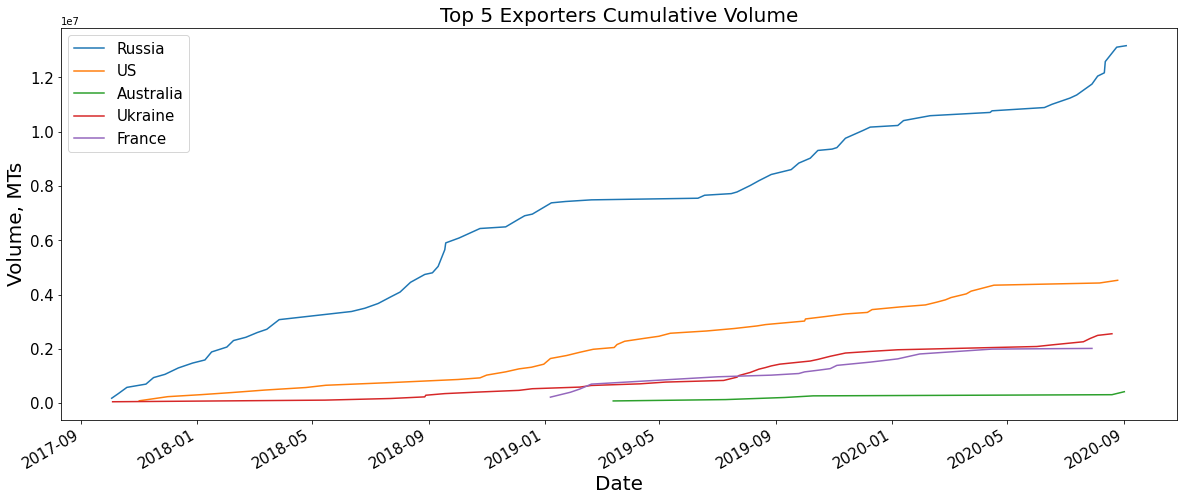

In [34]:
# As we can see from below chart, France's cumulative tender volume is flat drop since this May.

Russia_volume = Russia_data.groupby("Date").Volume_mts.sum().sort_index(ascending = True).cumsum()
US_volume = US_data.groupby("Date").Volume_mts.sum().sort_index(ascending = True).cumsum()
Australia_volume = Australia_data.groupby("Date").Volume_mts.sum().sort_index(ascending = True).cumsum()
Ukraine_volume = Ukraine_data.groupby("Date").Volume_mts.sum().sort_index(ascending = True).cumsum()
France_volume = France_data.groupby("Date").Volume_mts.sum().sort_index(ascending = True).cumsum()

Russia_volume.plot(figsize = (20,8),fontsize = 15, label = "Russia")
US_volume.plot(figsize = (20,8),fontsize = 15, label = "US")
Australia_volume.plot(figsize = (20,8),fontsize = 15, label = "Australia")
Ukraine_volume.plot(figsize = (20,8),fontsize = 15, label = "Ukraine")
France_volume.plot(figsize = (20,8),fontsize = 15, label = "France")

plt.title("Top 5 Exporters Cumulative Volume", fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Volume, MTs", fontsize = 20)
plt.legend(fontsize = 15)

#### Origin company sales revenue

In [35]:
top_10 = tender.groupby("Company").Revenue.sum().sort_values(ascending = False).iloc[:10]
top_10

Company
Glencore    1.173277e+09
Cargill     1.077310e+09
LDC         8.021678e+08
ADM         7.501085e+08
GTCS        6.963129e+08
Ameropa     6.875024e+08
Holbud      6.874217e+08
Bunge       6.508308e+08
Soufflet    6.296981e+08
Casillo     6.071301e+08
Name: Revenue, dtype: float64

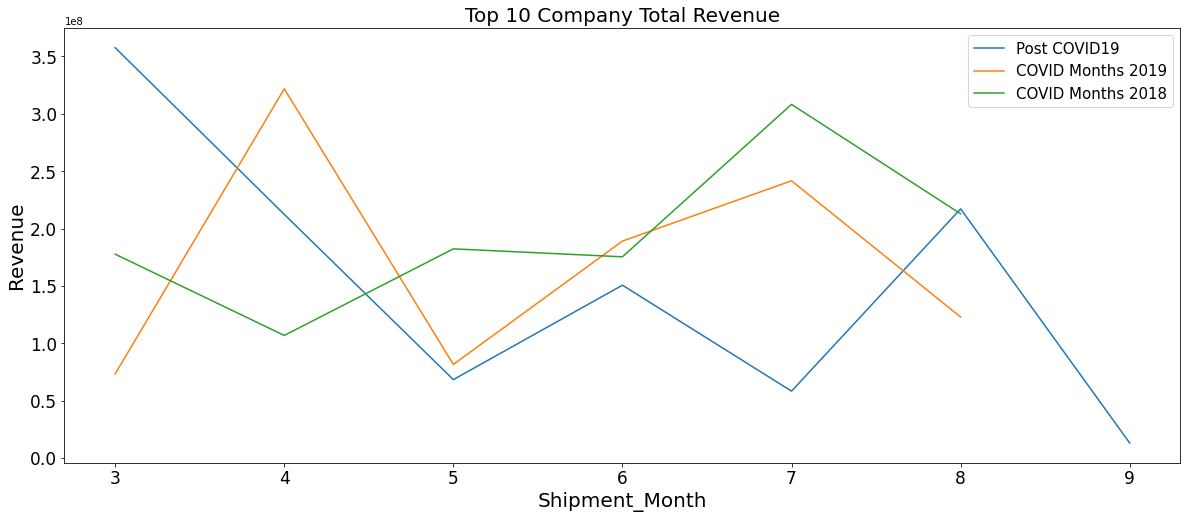

In [36]:
Top_10_list = top_10.reset_index()["Company"].unique()

Post_covid19_top_10 = Post_covid19[Post_covid19["Company"].isin(Top_10_list)].groupby("tender_month").Revenue.sum()
Pre_covid19_2019_top_10 = covid_months_2019[covid_months_2019["Company"].isin(Top_10_list)].groupby("tender_month").Revenue.sum()
Pre_covid19_2018_top_10 = covid_months_2018[covid_months_2018["Company"].isin(Top_10_list)].groupby("tender_month").Revenue.sum()

Post_covid19_top_10.plot(figsize = (20,8), fontsize = 17, label = "Post COVID19")
Pre_covid19_2019_top_10.plot(figsize = (20,8), fontsize = 17, label = "COVID Months 2019")
Pre_covid19_2018_top_10.plot(figsize = (20,8), fontsize = 17, label = "COVID Months 2018")

plt.title("Top 10 Company Total Revenue", fontsize = 20)
plt.xlabel("Shipment_Month",fontsize = 20)
plt.ylabel("Revenue", fontsize = 20)
plt.legend(fontsize = 15)

>Impact of COVID-19 is direct and visible in the lower revenues reported by the top 10 companies since the onset of the pandemic. The trend is largely in line with the monthly volumes of tender wheat during the period.

>The sharp drop observed in September was primarily due to the limited data points on price of transactions available during the month (cut off data was 3rd Sept). So the drop can be ignored from the above study.

## Inference :
### Based on our above analysis of the wheat tender data, it can be observed and concluded that the onset of the COVID-19 pandemic has had an material impact on prices and a moderate impact on volume that inturn impacted the revenue levels amongts the industry players.

# Part 2:

> Studying the impact of COVID19 on Wheat futures market (both US and Blacksea futures) and its relationship with other commodity futures and USDX

### Data Import and Cleanup

In [37]:
start = datetime.date(2017, 9, 20)
end = datetime.date(2020, 9, 3)

In [38]:
def data (tickers, start, end):
    
    def data(ticker):
        return web.DataReader(ticker, 'yahoo', start, end)
    
    futures = map(data, tickers)
    
    return pd.concat(futures, keys = tickers, names = ["Ticker", "Date"])

In [39]:
tickers = ["ZC=F", "ZS=F", "ZM=F", "ZW=F", "BWF=F", "DX-Y.NYB"]

In [40]:
futures = data(tickers, start, end)
futures

High         Low        Open       Close    Volume  \
Ticker   Date                                                                   
ZC=F     2017-09-19  353.250000  346.500000  351.000000  348.250000  159676.0   
         2017-09-20  351.500000  347.250000  348.000000  350.000000  112067.0   
         2017-09-21  351.250000  348.500000  349.500000  350.250000   93436.0   
         2017-09-22  356.250000  349.500000  349.750000  353.500000  138975.0   
         2017-09-25  355.000000  351.250000  352.750000  353.750000  109525.0   
...                         ...         ...         ...         ...       ...   
DX-Y.NYB 2020-08-30   92.362999   92.246002   92.299004   92.263000       0.0   
         2020-08-31   92.480003   91.989998   92.300003   92.139999       0.0   
         2020-09-01   92.400002   91.750000   92.180000   92.339996       0.0   
         2020-09-02   92.870003   92.209999   92.279999   92.849998       0.0   
         2020-09-03   93.070000   92.650002   92.660004   92.739998       0.0   

                      Adj Close  
Ticker   Date                    
ZC=F     2017-09-19  348.250000  
         2017-09-20  350.000000  
         2017-09-21  350.250000  
         2017-09-22  353.500000  
         2017-09-25  353.750000  
...                         ...  
DX-Y.NYB 2020-08-30   92.263000  
         2020-08-31   92.139999  
         2020-09-01   92.339996  
         2020-09-02   92.849998  
         2020-09-03   92.739998  

[4374 rows x 6 columns]

In [41]:
closing_prices = futures["Adj Close"].reset_index()
closing_prices

Ticker       Date   Adj Close
0         ZC=F 2017-09-19  348.250000
1         ZC=F 2017-09-20  350.000000
2         ZC=F 2017-09-21  350.250000
3         ZC=F 2017-09-22  353.500000
4         ZC=F 2017-09-25  353.750000
...        ...        ...         ...
4369  DX-Y.NYB 2020-08-30   92.263000
4370  DX-Y.NYB 2020-08-31   92.139999
4371  DX-Y.NYB 2020-09-01   92.339996
4372  DX-Y.NYB 2020-09-02   92.849998
4373  DX-Y.NYB 2020-09-03   92.739998

[4374 rows x 3 columns]

In [42]:
futures_df = closing_prices.pivot("Date", "Ticker", "Adj Close")
futures_df.head()

Ticker      BWF=F   DX-Y.NYB    ZC=F        ZM=F    ZS=F    ZW=F
Date                                                            
2017-09-19    NaN  91.790001  348.25  305.000000  965.50  443.00
2017-09-20    NaN  92.510002  350.00  306.299988  970.00  449.75
2017-09-21    NaN  92.260002  350.25  309.000000  970.75  452.50
2017-09-22    NaN  92.169998  353.50  315.000000  984.25  449.50
2017-09-25    NaN  92.650002  353.75  310.100006  971.25  454.00

In [43]:
futures_df.rename(columns = {"ZC=F":"Corn_futures", 
                             "ZM=F":"Soybeanmeal_futures", 
                             "ZS=F":"Soybean_futures", 
                             "ZW=F":"Wheat_futures", 
                             "BWF=F":"Blacksea_Wheat_futures", 
                             "DX-Y.NYB":"USDX"}, inplace = True)
futures_df

Ticker      Blacksea_Wheat_futures       USDX  Corn_futures  \
Date                                                          
2017-09-19                     NaN  91.790001        348.25   
2017-09-20                     NaN  92.510002        350.00   
2017-09-21                     NaN  92.260002        350.25   
2017-09-22                     NaN  92.169998        353.50   
2017-09-25                     NaN  92.650002        353.75   
...                            ...        ...           ...   
2020-08-30                     NaN  92.263000           NaN   
2020-08-31                  203.00  92.139999        348.50   
2020-09-01                  216.50  92.339996        349.50   
2020-09-02                  216.00  92.849998        349.75   
2020-09-03                  216.25  92.739998        344.50   

Ticker      Soybeanmeal_futures  Soybean_futures  Wheat_futures  
Date                                                             
2017-09-19           305.000000           965.50         443.00  
2017-09-20           306.299988           970.00         449.75  
2017-09-21           309.000000           970.75         452.50  
2017-09-22           315.000000           984.25         449.50  
2017-09-25           310.100006           971.25         454.00  
...                         ...              ...            ...  
2020-08-30                  NaN              NaN            NaN  
2020-08-31           304.600006           951.25         544.25  
2020-09-01           302.799988           955.00         555.75  
2020-09-02           302.299988           962.50         547.75  
2020-09-03           305.200012           968.75         543.25  

[743 rows x 6 columns]

### Observing price trends across periods

In [44]:
# Defining timeframes within the futures_df for comparative analysis

COVID_months_2018f = futures_df.loc["2018-03-01":"2018-09-03"]
COVID_months_2019f = futures_df.loc["2019-03-01":"2019-09-03"]
Post_COVID19f = futures_df.loc["2020-03-01":"2020-09-03"]

In [45]:
COVID_months_2018f["Period"] = "COVIDm2018"
COVID_months_2019f["Period"] = "COVIDm2019"
Post_COVID19f["Period"] = "postCOVID"

In [46]:
comparison_df = pd.concat([COVID_months_2018f, COVID_months_2019f, Post_COVID19f])
comparison_df

Ticker      Blacksea_Wheat_futures       USDX  Corn_futures  \
Date                                                          
2018-03-01                  209.00  90.320000        378.75   
2018-03-02                  208.00  89.940002        377.25   
2018-03-05                  207.75  90.080002        378.25   
2018-03-06                  207.50  89.620003        379.75   
2018-03-07                  207.25  89.639999        379.25   
...                            ...        ...           ...   
2020-08-30                     NaN  92.263000           NaN   
2020-08-31                  203.00  92.139999        348.50   
2020-09-01                  216.50  92.339996        349.50   
2020-09-02                  216.00  92.849998        349.75   
2020-09-03                  216.25  92.739998        344.50   

Ticker      Soybeanmeal_futures  Soybean_futures  Wheat_futures      Period  
Date                                                                         
2018-03-01           394.000000          1057.50         505.50  COVIDm2018  
2018-03-02           390.200012          1060.75         492.00  COVIDm2018  
2018-03-05           389.299988          1066.75         502.25  COVIDm2018  
2018-03-06           384.500000          1064.50         502.00  COVIDm2018  
2018-03-07           380.200012          1055.00         493.00  COVIDm2018  
...                         ...              ...            ...         ...  
2020-08-30                  NaN              NaN            NaN   postCOVID  
2020-08-31           304.600006           951.25         544.25   postCOVID  
2020-09-01           302.799988           955.00         555.75   postCOVID  
2020-09-02           302.299988           962.50         547.75   postCOVID  
2020-09-03           305.200012           968.75         543.25   postCOVID  

[391 rows x 7 columns]

In [47]:
Daily_price_plot = Post_COVID19f.dropna().reset_index()
Daily_price_plot

Ticker       Date  Blacksea_Wheat_futures       USDX  Corn_futures  \
0      2020-03-02                  212.00  97.360001        374.75   
1      2020-03-03                  212.75  97.150002        381.75   
2      2020-03-04                  211.50  97.339996        387.00   
3      2020-03-05                  211.25  96.820000        384.50   
4      2020-03-06                  211.00  95.949997        377.25   
..            ...                     ...        ...           ...   
126    2020-08-28                  222.00  92.290001        346.00   
127    2020-08-31                  203.00  92.139999        348.50   
128    2020-09-01                  216.50  92.339996        349.50   
129    2020-09-02                  216.00  92.849998        349.75   
130    2020-09-03                  216.25  92.739998        344.50   

Ticker  Soybeanmeal_futures  Soybean_futures  Wheat_futures     Period  
0                302.200012           890.50         526.25  postCOVID  
1                303.799988           893.00         528.75  postCOVID  
2                305.200012           898.75         521.50  postCOVID  
3                300.399994           889.00         524.25  postCOVID  
4                301.299988           883.25         521.25  postCOVID  
..                      ...              ...            ...        ...  
126              301.600006           950.50         539.25  postCOVID  
127              304.600006           951.25         544.25  postCOVID  
128              302.799988           955.00         555.75  postCOVID  
129              302.299988           962.50         547.75  postCOVID  
130              305.200012           968.75         543.25  postCOVID  

[131 rows x 8 columns]

In [48]:
import plotly.graph_objs as go

comparison = [go.Scatter(x = Daily_price_plot.Date, y = Daily_price_plot.Wheat_futures, name = "Wheat futures"),
              go.Scatter(x = Daily_price_plot.Date, y = Daily_price_plot.USDX, name = "USDX"),
              go.Scatter(x = Daily_price_plot.Date, y = Daily_price_plot.Corn_futures, name = "Corn_futures"),
              go.Scatter(x = Daily_price_plot.Date, y = Daily_price_plot.Soybeanmeal_futures, name = "Soybeanmeal_futures"),
              go.Scatter(x = Daily_price_plot.Date, y = Daily_price_plot.Soybean_futures, name = "Soybean_futures")]
              
              
updatemenus = list([
    dict(active = -1, 
         buttons = list([ 
             dict(label = "Wheat futures",
                  method = "update",
                  args = [{"visible": [True, False,False,False,False]},
                          {"title": "Wheat futures" }]), 
             
             dict(label = "USDX",
                  method = "update",
                  args = [{"visible": [False, True,False,False,False]},
                          {"title": "USDX"}]),
             
             dict(label = "Corn_futures",
                  method = "update",
                  args = [{"visible": [False,False,True,False,False]},
                          {"title": "Corn_futures"}]),
             
             dict(label = "Soybeanmeal_futures",
                  method = "update",
                  args = [{"visible": [False,False,False,True,False]},
                          {"title": "Soybeanmeal_futures"}]),
             
             dict(label = "Soybean_futures",
                  method = "update",
                  args = [{"visible": [False, False,False,False,True]},
                          {"title": "Soybean_futures"}]),
             
             dict(label = "All",
                  method = "update",
                  args = [{"visible": [True, True,True,True,True]},
                          {"title": "All data points"}]),
           
         ]),
        )
])


layout = dict(title = "Tracking Commodity Futures Price Movements", updatemenus = updatemenus) 

figure = dict(data = comparison, layout = layout)

go.Figure(figure)

In [49]:
comparison_base = [go.Scatter(x = Daily_price_plot.Date, y = Daily_price_plot.Wheat_futures/Daily_price_plot.Wheat_futures.iloc[0]-1, name = "Wheat futures"),
              go.Scatter(x = Daily_price_plot.Date, y = Daily_price_plot.USDX/Daily_price_plot.USDX.iloc[0]-1, name = "USDX"),
              go.Scatter(x = Daily_price_plot.Date, y = Daily_price_plot.Corn_futures/Daily_price_plot.Corn_futures.iloc[0]-1, name = "Corn_futures"),
              go.Scatter(x = Daily_price_plot.Date, y = Daily_price_plot.Soybeanmeal_futures/Daily_price_plot.Soybeanmeal_futures.iloc[0]-1, name = "Soybeanmeal_futures"),
              go.Scatter(x = Daily_price_plot.Date, y = Daily_price_plot.Soybean_futures/Daily_price_plot.Soybean_futures.iloc[0]-1, name = "Soybean_futures")]
              
              
updatemenus = list([
    dict(active = -1, 
         buttons = list([ 
             dict(label = "Wheat futures",
                  method = "update",
                  args = [{"visible": [True, False,False,False,False]},
                          {"title": "Wheat futures" }]), 
             
             dict(label = "USDX",
                  method = "update",
                  args = [{"visible": [False, True,False,False,False]},
                          {"title": "USDX"}]),
             
             dict(label = "Corn_futures",
                  method = "update",
                  args = [{"visible": [False,False,True,False,False]},
                          {"title": "Corn_futures"}]),
             
             dict(label = "Soybeanmeal_futures",
                  method = "update",
                  args = [{"visible": [False,False,False,True,False]},
                          {"title": "Soybeanmeal_futures"}]),
             
             dict(label = "Soybean_futures",
                  method = "update",
                  args = [{"visible": [False, False,False,False,True]},
                          {"title": "Soybean_futures"}]),
             
              dict(label = "All",
                  method = "update",
                  args = [{"visible": [True, True,True,True,True]},
                          {"title": "All data points"}]),
           
         ]),
        )
])


layout = dict(title = "Tracking Commodity Futures Price Movements (with Mar 1st 2020 as base)", updatemenus = updatemenus) 

figure = dict(data = comparison_base, layout = layout)

go.Figure(figure)

>Wheat Futures prices have been observed to largely hold on to their price gains since the onset of the pandemic. We will study the mean value during the period to observe an patterns across periods.

### Study of mean future prices across periods

In [50]:
wheat_futures_mean = comparison_df.groupby("Period").Wheat_futures.mean()
USDX_mean = comparison_df.groupby("Period").USDX.mean()
Corn_futures_mean = comparison_df.groupby("Period").Corn_futures.mean()
Soybeanmeal_futures_mean = comparison_df.groupby("Period").Soybeanmeal_futures.mean()
Blacksea_Wheat_futures_mean = comparison_df.groupby("Period").Blacksea_Wheat_futures.mean()

In [51]:
mean_df_list = [wheat_futures_mean, USDX_mean, Corn_futures_mean, Soybeanmeal_futures_mean, Blacksea_Wheat_futures_mean]

from functools import reduce #Applying the function to all elements in the list in one go
mean_df = reduce(lambda x,y: pd.merge(x,y, on="Period", how="outer"), mean_df_list)

mean_df.T

Period                  COVIDm2018  COVIDm2019   postCOVID
Wheat_futures           502.902344  477.146484  521.748092
USDX                     93.016485   97.377422   97.071430
Corn_futures            372.824219  389.525391  331.423664
Soybeanmeal_futures     356.701562  304.275780  292.496947
Blacksea_Wheat_futures  212.027344  206.726562  212.110687

[Text(0, 0, 'Wheat_futures'),
 Text(0, 0, 'USDX'),
 Text(0, 0, 'Corn_futures'),
 Text(0, 0, 'Soybeanmeal_futures'),
 Text(0, 0, 'Blacksea_Wheat_futures')]

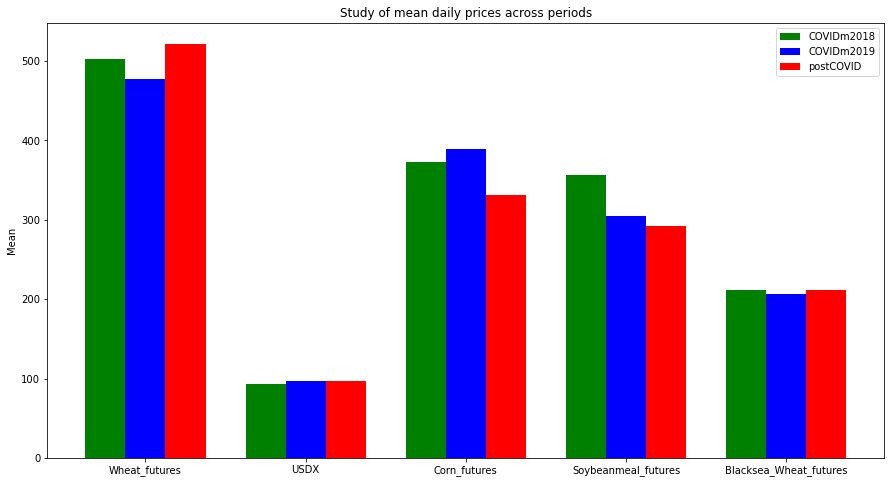

In [52]:
loc = [0, 1, 2, 3, 4] #position of the bars in the chart
width = 0.25
fig, ax = plt.subplots(figsize=(15,8))

plt.bar(loc, mean_df.T["COVIDm2018"], width, color="Green")
plt.bar([l + width for l in loc], mean_df.T["COVIDm2019"], width, color="Blue")
plt.bar([l + width*2 for l in loc], mean_df.T["postCOVID"], width, color="Red")
plt.legend(["COVIDm2018", "COVIDm2019", "postCOVID"], loc='upper right')

ax.set_ylabel("Mean")
ax.set_title("Study of mean daily prices across periods")
ax.set_xticks([0.25, 1.25, 2.25, 3.25, 4.25])
ax.set_xticklabels(["Wheat_futures", "USDX", "Corn_futures", "Soybeanmeal_futures", "Blacksea_Wheat_futures"])

Amongst the commodities under study, mean future prices of wheat has increased during the postCOVID period whereas other commodities prices have seen a decline. We observe that outlook on wheat prices has improved since the onset of the pandemic.

### Studying variability across periods for the future prices.

In [53]:
wheat_futures_std = comparison_df.groupby("Period").Wheat_futures.std()
USDX_std = comparison_df.groupby("Period").USDX.std()
Corn_futures_std = comparison_df.groupby("Period").Corn_futures.std()
Soybeanmeal_futures_std = comparison_df.groupby("Period").Soybeanmeal_futures.std()
Blacksea_Wheat_futures_std = comparison_df.groupby("Period").Blacksea_Wheat_futures.std()

In [54]:
std_df_list = [wheat_futures_std, USDX_std, Corn_futures_std, Soybeanmeal_futures_std, Blacksea_Wheat_futures_std]

std_df = reduce(lambda x,y: pd.merge(x,y, on="Period", how="outer"), std_df_list)

std_df.T

Period                  COVIDm2018  COVIDm2019  postCOVID
Wheat_futures            30.316672   33.019359  22.108180
USDX                      2.238758    0.616196   2.810336
Corn_futures             18.935769   33.815922  17.764942
Soybeanmeal_futures      26.539063    9.816568  10.981109
Blacksea_Wheat_futures    9.932609   13.900959   9.175750

[Text(0, 0, 'Wheat_futures'),
 Text(0, 0, 'USDX'),
 Text(0, 0, 'Corn_futures'),
 Text(0, 0, 'Soybeanmean_futures'),
 Text(0, 0, 'Blacksea_Wheat_futures')]

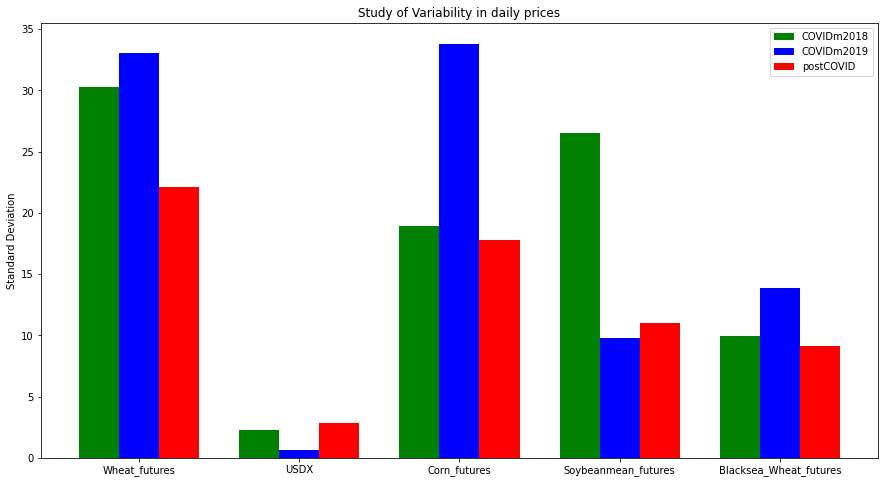

In [55]:
loc = [0, 1, 2, 3, 4] #position of the bars in the chart
width = 0.25
fig, ax = plt.subplots(figsize=(15,8))

plt.bar(loc, std_df.T["COVIDm2018"], width, color="Green")
plt.bar([l + width for l in loc], std_df.T["COVIDm2019"], width, color="Blue")
plt.bar([l + width*2 for l in loc], std_df.T["postCOVID"], width, color="Red")
plt.legend(["COVIDm2018", "COVIDm2019", "postCOVID"], loc='upper right')

ax.set_ylabel('Standard Deviation')
ax.set_title('Study of Variability in daily prices')
ax.set_xticks([0.25, 1.25, 2.25, 3.25, 4.25])
ax.set_xticklabels(["Wheat_futures", "USDX", "Corn_futures", "Soybeanmean_futures", "Blacksea_Wheat_futures"])



### Studying daily percentage change within one year for the future prices.

In [56]:
futures_pct_change=futures_df["2019-09-01":"2020-09-03"][["USDX","Corn_futures","Soybeanmeal_futures","Soybean_futures","Wheat_futures","Blacksea_Wheat_futures"]].pct_change().reset_index()

In [57]:
comparison = [go.Scatter(x = futures_pct_change.Date, y = futures_pct_change.Wheat_futures, name = "Wheat futures"),
              go.Scatter(x = futures_pct_change.Date, y = futures_pct_change.USDX, name = "USDX"),
              go.Scatter(x = futures_pct_change.Date, y = futures_pct_change.Corn_futures, name = "Corn_futures"),
              go.Scatter(x = futures_pct_change.Date, y = futures_pct_change.Soybeanmeal_futures, name = "Soybeanmeal_futures"),
              go.Scatter(x = futures_pct_change.Date, y = futures_pct_change.Soybean_futures, name = "Soybean_futures" )]
              
              
updatemenus = list([
    dict(active = -1, 
         buttons = list([ 
             dict(label = "Blacksea_Wheat_futures",
                  method = "update",
                  args = [{"visible": [True, False,False,False,False,False]},
                          {"title": "Blacksea_Wheat_futures" }]), 
             
             dict(label = "Wheat futures",
                  method = "update",
                  args = [{"visible": [False,True,False,False,False,False]},
                          {"title": "Wheat futures" }]), 
             
             dict(label = "USDX",
                  method = "update",
                  args = [{"visible": [False,False,True,False,False,False]},
                          {"title": "USDX"}]),
             
             dict(label = "Corn_futures",
                  method = "update",
                  args = [{"visible": [False,False,False,True,False,False]},
                          {"title": "Corn_futures"}]),
             
             dict(label = "Soybeanmeal_futures",
                  method = "update",
                  args = [{"visible": [False,False,False,False,True,False]},
                          {"title": "Soybeanmeal_futures"}]),
             
             dict(label = "Soybean_futures",
                  method = "update",
                  args = [{"visible": [False, False,False,False,False,True]},
                          {"title": "Soybean_futures"}]),
             
             dict(label = "All",
                  method = "update",
                  args = [{"visible": [True, True,True,True,True,True]},
                          {"title": "All data points"}]),
           
         ]),
        )
])


layout = dict(title = "daily Percentage change", updatemenus = updatemenus) 

figure = dict(data = comparison, layout = layout)

go.Figure(figure)

The variability of futures prices of the commodities under study during the postCOVID period has not seen any significant increase when compared to the same period in the preceding years. However we do observe increased extreme price movements during the postCOVID period compared to the 6 month period immediately preceding the same (not accounting for any seasonality associated with the comparison period).

`We observe and conclude that the any disruption in prices that the onset of the pandemic may have had on the commodity futures prices under study would have been shortlived and the price trends have largely remained stable.`

# Part 3
### Merging the wheat tender data and futures prices and observe relationships between them


#### Merging the databases and cleanup

In [58]:
modelling_df = pd.merge(tender_clean, futures_df, on="Date", how = "outer").dropna()

#Creating wheat flat price using conversion ratio 36.7437 and get the premium

modelling_df['Wheat_flat_price'] = modelling_df["Wheat_futures"]*36.7437/100
modelling_df['Wheat_Premium'] = modelling_df["wheat_price"] - modelling_df['Wheat_flat_price']

modelling_df

Date     Importer Tenderer Product        Quality         Company  \
0   2020-09-03        Egypt     GASC   Wheat    Milling 12%         Cargill   
1   2020-09-01  Philippines    PAFMI   Wheat           Feed             CBH   
2   2020-08-27  South Korea     NOFI   Wheat           Feed           Cofco   
3   2020-08-25       Taiwan      FMA   Wheat      HRS 14.5%  Columbia Grain   
4   2020-08-25       Taiwan      FMA   Wheat      HRS 14.5%             CHS   
..         ...          ...      ...     ...            ...             ...   
977 2018-01-04      Algeria     OAIC   Wheat    Milling 11%             LDC   
978 2018-01-04      Algeria     OAIC   Wheat    Milling 11%           Cofco   
979 2018-01-04      Algeria     OAIC   Wheat    Milling 11%         Cargill   
980 2017-12-27        Egypt     GASC   Wheat  Milling 12.5%    Posco Daewoo   
981 2017-12-27        Egypt     GASC   Wheat  Milling 12.5%            GTCS   

      Exporter Shipment_Start Shipment_End  Volume_mts  ...  tender_month  \
0       Russia     2020-11-05  15 Nov 2020     55000.0  ...           9.0   
1    Australia     2020-11-01  31 Dec 2020    110000.0  ...           9.0   
2      Unknown     2020-10-28  20 Dec 2020     65000.0  ...           8.0   
3           US     2020-10-29  12 Nov 2020     30635.0  ...           8.0   
4           US     2020-10-13  27 Oct 2020     30955.0  ...           8.0   
..         ...            ...          ...         ...  ...           ...   
977    Unknown     2018-03-01  31 Mar 2018     90000.0  ...           1.0   
978    Unknown     2018-03-01  31 Mar 2018     60000.0  ...           1.0   
979    Unknown     2018-03-01  31 Mar 2018     90000.0  ...           1.0   
980     Russia     2018-02-01  10 Feb 2018     60000.0  ...          12.0   
981     Russia     2018-02-01  10 Feb 2018    120000.0  ...          12.0   

     Season  Blacksea_Wheat_futures       USDX Corn_futures  \
0    Others                  216.25  92.739998       344.50   
1    Others                  216.50  92.339996       349.50   
2    Others                  202.00  93.010002       344.25   
3    Others                  202.00  93.019997       340.75   
4    Others                  202.00  93.019997       340.75   
..      ...                     ...        ...          ...   
977  Others                  190.00  91.849998       351.00   
978  Others                  190.00  91.849998       351.00   
979  Others                  190.00  91.849998       351.00   
980  Others                  190.00  93.029999       353.75   
981  Others                  190.00  93.029999       353.75   

     Soybeanmeal_futures  Soybean_futures  Wheat_futures  Wheat_flat_price  \
0             305.200012           968.75         543.25        199.610150   
1             302.799988           955.00         555.75        204.203113   
2             294.899994           937.25         542.50        199.334573   
3             291.600006           913.75         527.25        193.731158   
4             291.600006           913.75         527.25        193.731158   
..                   ...              ...            ...               ...   
977           315.799988           959.25         434.00        159.467658   
978           315.799988           959.25         434.00        159.467658   
979           315.799988           959.25         434.00        159.467658   
980           314.200012           955.50         428.00        157.263036   
981           314.200012           955.50         428.00        157.263036   

     Wheat_Premium  
0        40.889850  
1        50.796887  
2        46.615427  
3       105.888842  
4       106.948842  
..             ...  
977      49.782342  
978      52.532342  
979      54.032342  
980      52.336964  
981      50.016964  

[936 rows x 23 columns]

In [59]:
Post_covid19 = modelling_df[modelling_df["Date"] > "2020-03-01"]
covid_months_2018 =modelling_df[(modelling_df["Date"] < "2018-09-03") & (modelling_df["Date"] > "2018-03-01")]
covid_months_2019 = modelling_df[(modelling_df["Date"] < "2019-09-03") & (modelling_df["Date"] > "2019-03-01")]

In [60]:
Post_covid19_daily_Wheat_Premium = Post_covid19.groupby("Date").Wheat_Premium.mean()
covid_months_2018_daily_Wheat_Premium = covid_months_2018.groupby("Date").Wheat_Premium.mean()
covid_months_2019_daily_Wheat_Premium = covid_months_2019.groupby("Date").Wheat_Premium.mean()

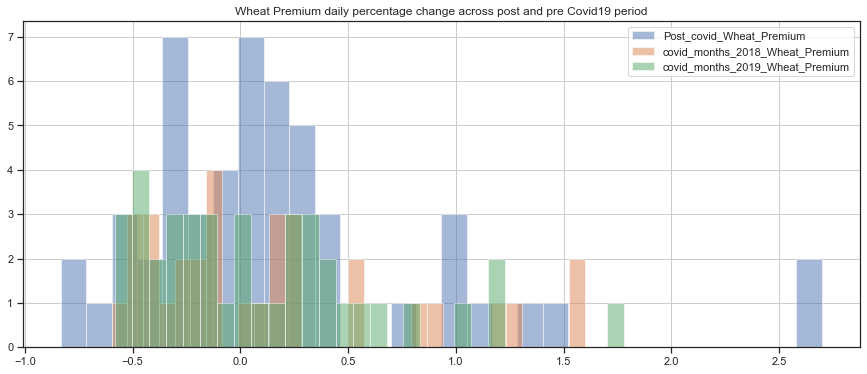

In [86]:
Post_covid19_PCRP_Wheat_Premium=Post_covid19_daily_Wheat_Premium.pct_change()
covid_months_2018_PCRP_Wheat_Premium=covid_months_2018_daily_Wheat_Premium.pct_change() 
covid_months_2019_PCRP_Wheat_Premium=covid_months_2019_daily_Wheat_Premium.pct_change()
Post_covid19_PCRP_Wheat_Premium.hist(bins = 30, figsize = (15,6), alpha = 0.5, label = "Post_covid_Wheat_Premium")
covid_months_2018_PCRP_Wheat_Premium.hist(bins = 30, figsize = (15,6), alpha = 0.5, label = "covid_months_2018_Wheat_Premium")
covid_months_2019_PCRP_Wheat_Premium.hist(bins = 30, figsize = (15,6), alpha = 0.5, label = "covid_months_2019_Wheat_Premium")
plt.title("Wheat Premium price daily percentage change across post and pre Covid19 period")
plt.legend(loc="upper right")

In [83]:
Post_covid19_daily_Wheat_flat_price = Post_covid19.groupby("Date").Wheat_flat_price.mean()
covid_months_2018_daily_Wheat_flat_price = covid_months_2018.groupby("Date").Wheat_flat_price.mean()
covid_months_2019_daily_Wheat_flat_price = covid_months_2019.groupby("Date").Wheat_flat_price.mean()

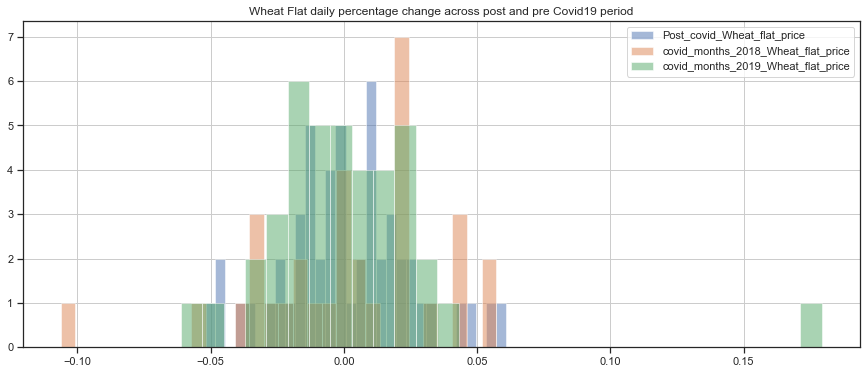

In [85]:
Post_covid19_PCRP_Wheat_flat_price=Post_covid19_daily_Wheat_flat_price.pct_change()
covid_months_2018_PCRP_Wheat_flat_price=covid_months_2018_daily_Wheat_flat_price.pct_change()
covid_months_2019_PCRP_Wheat_flat_price=covid_months_2019_daily_Wheat_flat_price.pct_change()
Post_covid19_PCRP_Wheat_flat_price.hist(bins = 30, figsize = (15,6), alpha = 0.5, label = "Post_covid_Wheat_flat_price")
covid_months_2018_PCRP_Wheat_flat_price.hist(bins = 30, figsize = (15,6), alpha = 0.5, label = "covid_months_2018_Wheat_flat_price")
covid_months_2019_PCRP_Wheat_flat_price.hist(bins = 30, figsize = (15,6), alpha = 0.5, label = "covid_months_2019_Wheat_flat_price")
plt.title("Wheat Flat price daily percentage change across post and pre Covid19 period")
plt.legend(loc="upper right")

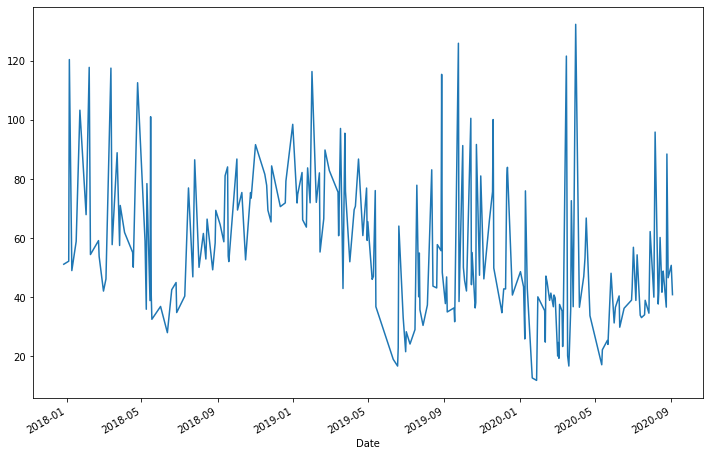

In [64]:
plt.figure(figsize = (12, 8))
modelling_df.groupby("Date").Wheat_Premium.mean().plot()

In [65]:
# let see when is the peak premium happened

modelling_df.groupby("Date").Wheat_Premium.mean().sort_values(ascending = False)

Date
2020-03-31    132.283540
2019-09-24    125.887225
2020-03-16    121.548874
2018-01-05    120.374846
2018-02-06    117.729572
                 ...    
2020-05-12     17.189745
2020-03-20     16.759598
2019-06-18     16.747235
2020-01-21     12.735385
2020-01-28     11.902769
Name: Wheat_Premium, Length: 224, dtype: float64

As observed from chart and premium ranking, we know premium fluctuate dramaticlly from mid-March to April and reached highest level at end March.

#### Studying relationship between the datapoints and regression plotting

In [66]:
corr_df = pd.DataFrame(modelling_df, columns=['wheat_price','Wheat_futures','Corn_futures','Soybeanmeal_futures','Soybean_futures','Blacksea_Wheat_futures','USDX'])

corrMatrix = corr_df.corr()
print (corrMatrix)

                        wheat_price  Wheat_futures  Corn_futures  \
wheat_price                1.000000       0.236481      0.052872   
Wheat_futures              0.236481       1.000000      0.168354   
Corn_futures               0.052872       0.168354      1.000000   
Soybeanmeal_futures        0.116762      -0.157108      0.323445   
Soybean_futures            0.093972      -0.074438      0.376462   
Blacksea_Wheat_futures     0.353755       0.298080     -0.105447   
USDX                      -0.030384       0.383010      0.035052   

                        Soybeanmeal_futures  Soybean_futures  \
wheat_price                        0.116762         0.093972   
Wheat_futures                     -0.157108        -0.074438   
Corn_futures                       0.323445         0.376462   
Soybeanmeal_futures                1.000000         0.734293   
Soybean_futures                    0.734293         1.000000   
Blacksea_Wheat_futures            -0.022049        -0.122167   
USDX   

It can be observed that there is no significant correlation between the wheat tender prices and traded wheat futures. Visual confirmation in terms of plots are given below.

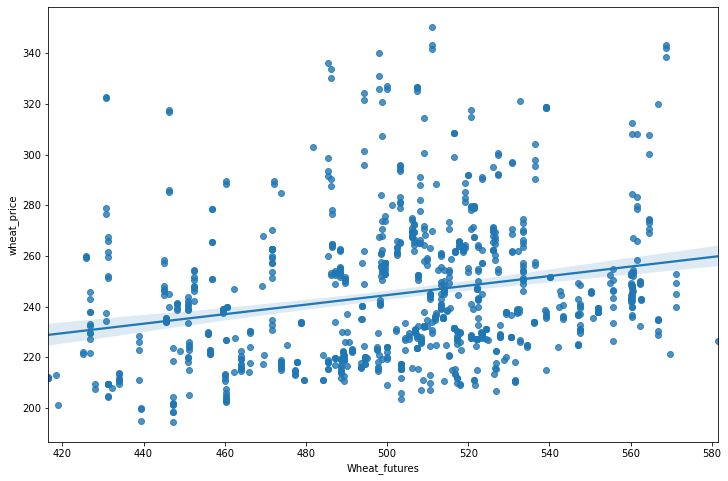

In [67]:
plt.figure(figsize = (12, 8))
sns.regplot(y = "wheat_price", x = "Wheat_futures", data = modelling_df, fit_reg = True)

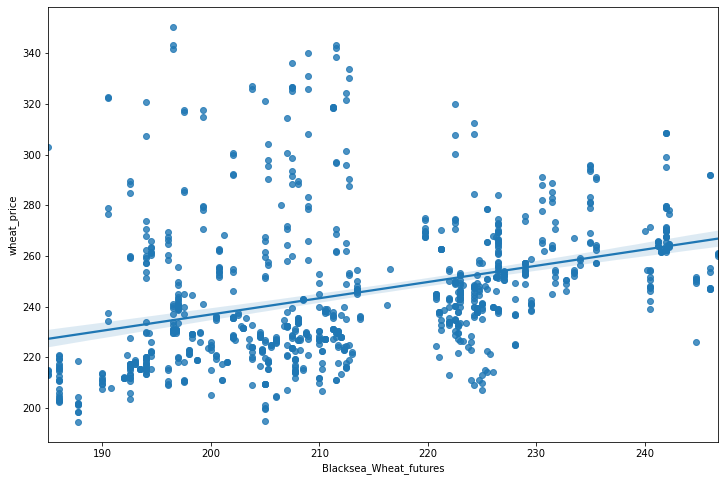

In [68]:
plt.figure(figsize = (12, 8))
sns.regplot(y = "wheat_price", x = "Blacksea_Wheat_futures", data = modelling_df, fit_reg = True)

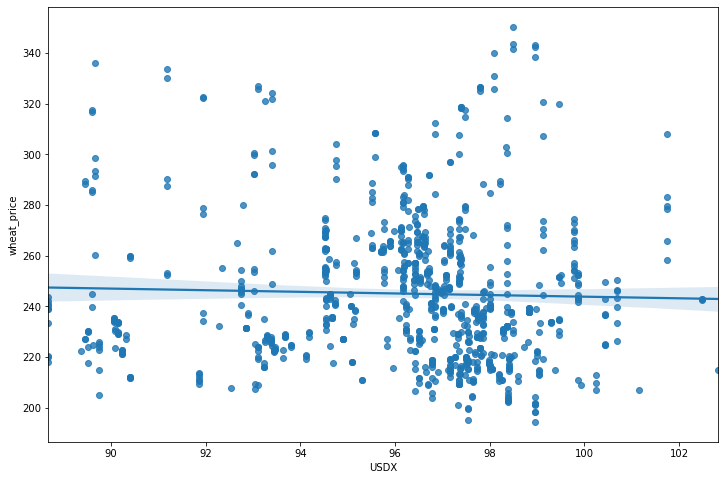

In [69]:
plt.figure(figsize = (12, 8))
sns.regplot(y = "wheat_price", x = "USDX", data = modelling_df, fit_reg = True)

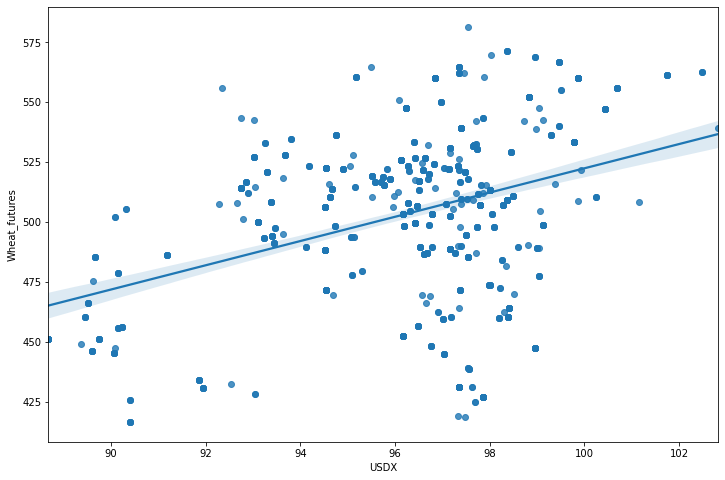

In [70]:
plt.figure(figsize = (12, 8))
sns.regplot(y = "Wheat_futures", x = "USDX", data = modelling_df, fit_reg = True)

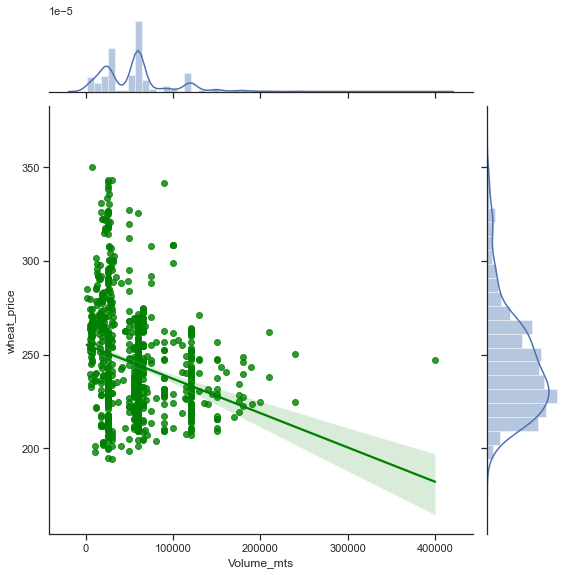

In [71]:
sns.set(style = "ticks")

sns.jointplot(y = "wheat_price",
              x = "Volume_mts",
              data = modelling_df,
              kind = "reg",
              joint_kws = {"color": "green"},
              height = 8)

In [72]:
Wheat_price_pct=modelling_df.groupby("Date").wheat_price.mean()
Wheat_Premium_pct=modelling_df.groupby("Date").Wheat_Premium.mean()
Wheat_flat_price_pct =modelling_df.groupby("Date").Wheat_flat_price.mean()
Wheat_futures_pct=modelling_df.groupby("Date").Wheat_futures.mean()
Blacksea_Wheat_futures_pct=modelling_df.groupby("Date").Blacksea_Wheat_futures.mean()
Corn_futures_pct=modelling_df.groupby("Date").Corn_futures.mean()
Soybean_futures_pct=modelling_df.groupby("Date").Soybean_futures.mean()
Soybeanmeal_futures_pct=modelling_df.groupby("Date").Soybeanmeal_futures.mean()

In [73]:
stocks=[Wheat_price_pct,Wheat_Premium_pct,Wheat_flat_price_pct,Wheat_futures_pct,Blacksea_Wheat_futures_pct,Corn_futures_pct,Soybean_futures_pct,Soybeanmeal_futures_pct]
tickers=["Wheat_price","Wheat_Premium","Wheat_flat_price","Wheat_futures","Blacksea_Wheat_futures","Corn_futures","Soybean_futures","Soybeanmeal_futures"]

In [74]:
just_closing_prices = pd.concat(stocks, keys = tickers, names = ["Ticker", "Date"])
just_closing_prices=pd.DataFrame(just_closing_prices)

In [75]:
just_closing_prices.rename(columns= {0:"Adj_Price"}, inplace=True)
just_closing_prices= just_closing_prices.reset_index()

In [76]:
daily_close_px = just_closing_prices.pivot(index="Date", columns = "Ticker",values="Adj_Price")
daily_close_px.head()

Ticker      Blacksea_Wheat_futures  Corn_futures  Soybean_futures  \
Date                                                                
2017-12-27                  190.00        353.75           955.50   
2018-01-04                  190.00        351.00           959.25   
2018-01-05                  190.50        351.25           961.50   
2018-01-09                  190.75        349.00           955.75   
2018-01-16                  192.00        348.25           968.00   

Ticker      Soybeanmeal_futures  Wheat_Premium  Wheat_flat_price  \
Date                                                               
2017-12-27           314.200012      51.176964        157.263036   
2018-01-04           315.799988      52.199009        159.467658   
2018-01-05           317.899994     120.374846        158.273488   
2018-01-09           314.500000      49.025357        158.824643   
2018-01-16           322.799988      58.888490        153.037510   

Ticker      Wheat_futures  Wheat_price  
Date                                    
2017-12-27         428.00   208.440000  
2018-01-04         434.00   211.666667  
2018-01-05         430.75   278.648333  
2018-01-09         432.25   207.850000  
2018-01-16         416.50   211.926000

In [77]:
daily_pct_change = daily_close_px / daily_close_px.shift(1) - 1

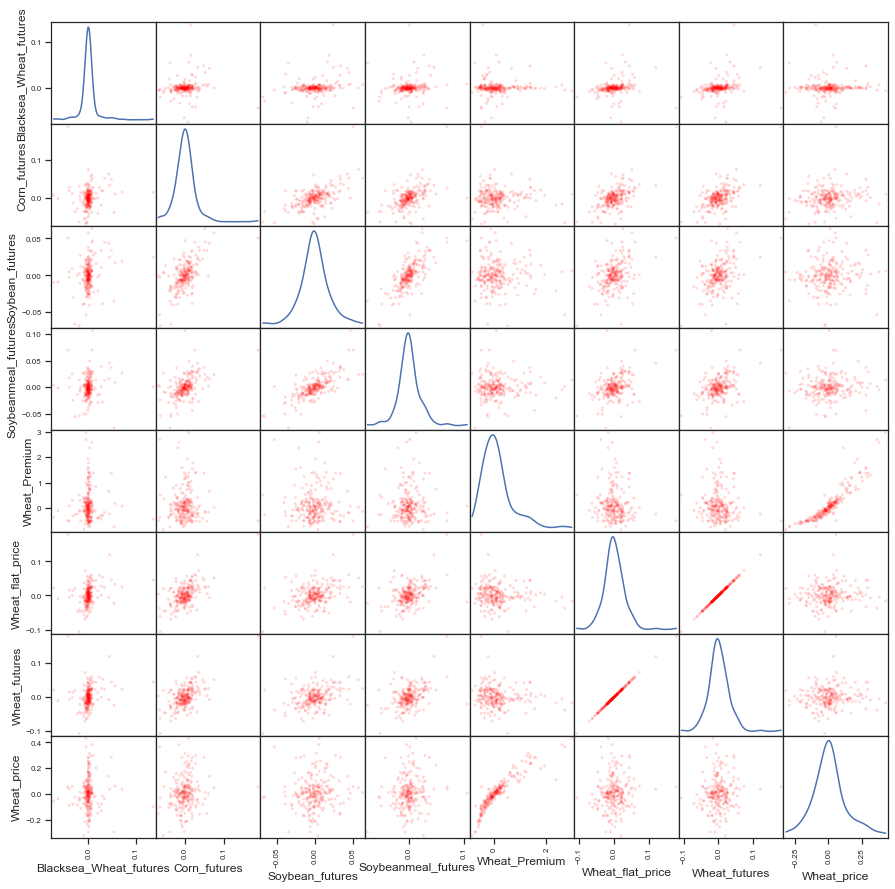

In [78]:
pd.plotting.scatter_matrix(daily_pct_change, diagonal = "kde", alpha = 0.15, figsize = (15,15), color = "red");

# `Overall Conclusion`

- Based on our analysis, we note that a material impact on the wheat tender prices and increased volatility has been observed since the onset of the Pandemic. 
- Covid-19 leads to slower total tender volume growth rate and sluggish top 10 company revenue.
- However wheat (and other related) futures prices have roughly remained almost unaffected during this period. 
- Seller gained bigger bargaining power on tender price by charging higher premium on buyer at pandemic initial stage. Such imbalance situation improved as market calm down around Mid-April.

## OLS


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split 
from statsmodels.formula.api import ols

In [ ]:
itrain, itest = train_test_split(range(modelling_df.shape[0]), train_size = 0.6)
mask = np.ones(modelling_df.shape[0], dtype = "int")
mask[itrain] = 1
mask[itest] = 0
mask = (mask == 1)

In [ ]:
Model = ols("wheat_price ~ Quality + Blacksea_Wheat_futures + Wheat_futures + Season + Soybeanmeal_futures", modelling_df[mask]).fit()
Model.summary()

## Reference
Holly Demaree-Saddler. (2020.07.27). France to produce smallest soft wheat crop in 25 years. World-Grain. https://www.world-grain.com/articles/14011-france-to-produce-smallest-soft-wheat-crop-in-25-years


## Appendices
- `Reported` - Date of the trade
- `Country` - Importer
- `Tenderer` - Company which handles the tender for the trade from the importing nation
- `Product` - Agricommodity (Wheat)
- `Quality` - Different types of wheat quality
- `Company` - Company which handles the tender for the trade from the exporting nation
- `Origin` - Exporter
- `Del start` - Deal start date
- `Del end` - Deal end date
- `Vol mt` - Volume in metric tonnes
- `$/mt` - USD price per metric tonne
- `PCRP` - Percentage change between reported periods
- `tender` – master data frame extracted from the dataset
- `tender_clean` – Dataframe filtered to contain wheat quality that has total aggregate trade of >300,000mts
- `Post_covid19` – tender data from 01/03/2020 to 03/09/2020
- `covid_months_2018` - tender data from 01/03/2018 to 03/09/2018
- `covid_months_2019` - tender data from 01/03/2019 to 03/09/2019
- `futures_df` – dataframe containing datewise prices for USDX and futures of wheat, blacksea wheat, soybean, soybeanmeal and - corn
- `modelling_df` – merger of tender dataframe and futures dataframe

## Contribution Statements
The above project was a collaborative effort of all the four team members and we all contributed towards all the sections in this notebook and reviewed and verified each others' work through out the development. Below statements only refer to details of primary responsibilities assigned to each team member in this collaborative project. 

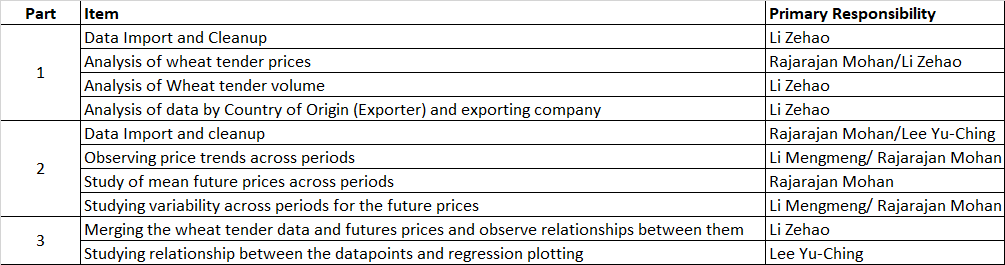